In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
deliveries = pd.read_csv('Ipl Data/deliveries.csv')

In [3]:
deliveries.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,0,0,0,1,0,0,1,1,NaN,NaN,NaN


In [4]:
batsmen = deliveries.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name="runs")

In [5]:
top_batsmen = batsmen.sort_values(by='runs', ascending=False)
top_batsmen=top_batsmen[top_batsmen.runs>=1000]

In [6]:
top_batsmen.rename(columns = {'batsman': 'player'}, inplace = True)

In [7]:
#find out top bowlers - counting most number of wickets
bowlers = deliveries[deliveries['dismissal_kind'] != 'run out']
bowlers = deliveries.groupby('bowler').apply(lambda x: x['dismissal_kind'].dropna().reset_index(name='wickets'))
bowlers

index wickets
bowler                            
A Ashish Reddy 0     80497  bowled
               1     80502  caught
               2     81750  caught
               3     82253  caught
               4     83084  caught
...                    ...     ...
Z Khan         114  142480  caught
               115  143476  bowled
               116  144752  caught
               117  147288  caught
               118  149389  caught

[9047 rows x 2 columns]

In [8]:
bowlers_df = bowlers.groupby('bowler').count().reset_index()
top_bowlers= bowlers_df.sort_values(by='wickets', ascending=False)
top_bowlers=top_bowlers[top_bowlers.wickets>=40]
top_bowlers.rename(columns = {'bowler': 'player'}, inplace = True)

In [9]:
all_rounders=pd.merge(top_batsmen, top_bowlers, how='inner')
all_rounders['score']=all_rounders['runs']+25*all_rounders['wickets']
all_rounders = all_rounders.sort_values(by='score', ascending=False)[:5]
all_rounders

,player,runs,index,wickets,score
0,SR Watson,3913,107,107,6588
6,DJ Bravo,1505,168,168,5705
4,RA Jadeja,2181,118,118,5131
2,KA Pollard,3064,68,68,4764
1,YK Pathan,3241,46,46,4391


C:\Users\kavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='player', ylabel='score'>

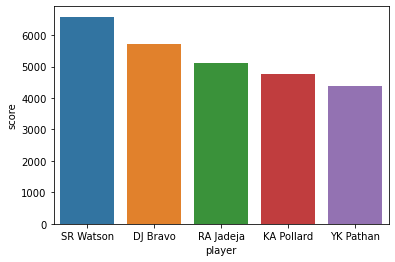

In [10]:
sns.barplot(all_rounders['player'],all_rounders['score'])